In [696]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [706]:
dir = 'round_3_2025/'

def simple_mid_price(row):
    bid = row[3]
    ask = row[9]
    if np.isnan(bid):
        bid = 0
    elif np.isnan(ask):
        ask = 0
    return (bid+ask) / 2

prices_1_0 = pd.read_csv(dir+"prices_round_3_day_0.csv", delimiter=';')
prices_1_1 = pd.read_csv(dir+"prices_round_3_day_1.csv", delimiter=';')
prices_1_1['timestamp'] += 1000000 # shift day 2 to 0-24h
prices_1_2 = pd.read_csv(dir+"prices_round_3_day_2.csv", delimiter=';')
prices_1_2['timestamp'] += 2000000 # shift day 2 to 0-24h

prices = pd.concat([prices_1_0, prices_1_1, prices_1_2])
prices['mid_price'] = prices.apply(simple_mid_price, axis=1)

prices = pd.concat([prices_1_0, prices_1_1, prices_1_2])

C:\Users\chris\AppData\Local\Temp\ipykernel_28312\1774657670.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bid = row[3]
C:\Users\chris\AppData\Local\Temp\ipykernel_28312\1774657670.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ask = row[9]


In [707]:
prices['product'].unique()

array(['VOLCANIC_ROCK_VOUCHER_10500', 'DJEMBES', 'CROISSANTS', 'JAMS',
       'VOLCANIC_ROCK_VOUCHER_10000', 'KELP',
       'VOLCANIC_ROCK_VOUCHER_9750', 'PICNIC_BASKET1', 'PICNIC_BASKET2',
       'VOLCANIC_ROCK_VOUCHER_9500', 'RAINFOREST_RESIN',
       'VOLCANIC_ROCK_VOUCHER_10250', 'SQUID_INK', 'VOLCANIC_ROCK'],
      dtype=object)

In [728]:

day_1 = prices[prices['day'] == 1]
df = day_1[day_1['product']=='VOLCANIC_ROCK_VOUCHER_10000']

underlying_prices = day_1[day_1['product']=='VOLCANIC_ROCK']['mid_price'].values

df['underlying'] = underlying_prices
df['time_to_expiry'] = 7/365 - df['timestamp'] / (365e6) # timestamps per year

df[['mid_price', 'time_to_expiry', 'underlying']]


C:\Users\chris\AppData\Local\Temp\ipykernel_28312\1461459803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['underlying'] = underlying_prices
C:\Users\chris\AppData\Local\Temp\ipykernel_28312\1461459803.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_expiry'] = 7/365 - df['timestamp'] / (365e6) # timestamps per year


,mid_price,time_to_expiry,underlying
12,517.5,0.016438,10516.0
18,516.5,0.016438,10515.0
39,516.5,0.016438,10515.0
53,519.5,0.016438,10517.0
64,521.5,0.016437,10519.5
...,...,...,...
139940,237.5,0.013700,10224.5
139948,237.5,0.013700,10225.5
139970,234.5,0.013699,10222.0
139977,237.5,0.013699,10223.5


In [5]:
# 1e6 timestamps/day
# 365 days/year
# 1e6*365 = 365e6 timestamps/year

In [179]:
voucher_df['time_to_expiry']

0         0.021918
1         0.021918
2         0.021918
3         0.021918
4         0.021918
            ...   
149995    0.013699
149996    0.013699
149997    0.013699
149998    0.013699
149999    0.013699
Name: time_to_expiry, Length: 150000, dtype: float64

In [186]:
(8e6 - voucher_df['timestamp'])

0         8000000.0
1         8000000.0
2         8000000.0
3         8000000.0
4         8000000.0
            ...    
149995    5000100.0
149996    5000100.0
149997    5000100.0
149998    5000100.0
149999    5000100.0
Name: timestamp, Length: 150000, dtype: float64

In [6]:
vouchers = ['VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_10000', 
            'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_9500',
            'VOLCANIC_ROCK_VOUCHER_10250']


voucher_df = prices[prices['product'].isin(vouchers)]
voucher_df.reset_index(drop=True, inplace=True)

# each round has 1 mil stamps
start_time = 1000000 * 8 # starting at day 0, expires on day 8

voucher_df['strike_price'] = voucher_df['product'].apply(lambda x: int(x.split('_')[-1]))
voucher_df['strike_price'] = voucher_df['strike_price'].astype(int)
voucher_df['time_to_expiry'] = (start_time - voucher_df['timestamp']) / 365e6 # convert to years

spot_price = prices[prices['product'] == 'VOLCANIC_ROCK'][['mid_price', 'timestamp']]
spot_price.rename(columns={'mid_price': 'underlying_price'}, inplace=True)


voucher_df = pd.merge(voucher_df, spot_price, on='timestamp', how='left')

voucher_df = voucher_df[['timestamp', 'product', 'mid_price', 'strike_price', 'time_to_expiry', 'underlying_price']]
voucher_df.head(20)

C:\Users\chris\AppData\Local\Temp\ipykernel_10388\1618201230.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voucher_df['strike_price'] = voucher_df['product'].apply(lambda x: int(x.split('_')[-1]))
C:\Users\chris\AppData\Local\Temp\ipykernel_10388\1618201230.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voucher_df['strike_price'] = voucher_df['strike_price'].astype(int)
C:\Users\chris\AppData\Local\Temp\ipykernel_10388\1618201230.py:14: SettingWithCopyWarning: 
A value is trying to be set on a 

,timestamp,product,mid_price,strike_price,time_to_expiry,underlying_price
0,0,VOLCANIC_ROCK_VOUCHER_10500,99.5,10500,0.021918,10503.0
1,0,VOLCANIC_ROCK_VOUCHER_10000,505.5,10000,0.021918,10503.0
2,0,VOLCANIC_ROCK_VOUCHER_9750,754.5,9750,0.021918,10503.0
3,0,VOLCANIC_ROCK_VOUCHER_9500,1003.5,9500,0.021918,10503.0
4,0,VOLCANIC_ROCK_VOUCHER_10250,273.5,10250,0.021918,10503.0
5,100,VOLCANIC_ROCK_VOUCHER_10000,515.5,10000,0.021918,10510.0
6,100,VOLCANIC_ROCK_VOUCHER_10250,279.5,10250,0.021918,10510.0
7,100,VOLCANIC_ROCK_VOUCHER_10500,102.5,10500,0.021918,10510.0
8,100,VOLCANIC_ROCK_VOUCHER_9750,761.5,9750,0.021918,10510.0
9,100,VOLCANIC_ROCK_VOUCHER_9500,1010.5,9500,0.021918,10510.0


# implied vol 

In [7]:
voucher_df['product'].unique()

array(['VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_10250'], dtype=object)

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq

def black_scholes_call(spot, strike, time_to_expiry, volatility, r=0.0):
    d1 = (np.log(spot / strike) + (r + 0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    call_price = (spot * norm.cdf(d1) - strike * np.exp(-r * time_to_expiry) * norm.cdf(d2))
    return call_price

def black_scholes_put(spot, strike, time_to_expiry, volatility, r=0.0):
    d1 = (np.log(spot / strike) + (r + 0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    put_price = (strike * np.exp(-r * time_to_expiry) * norm.cdf(-d2) - spot * norm.cdf(-d1))
    return put_price

def delta(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.cdf(d1)

def gamma(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.pdf(d1)/(spot * volatility * np.sqrt(time_to_expiry))

def vega(spot, strike, time_to_expiry, volatility):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    return norm.pdf(d1) * (spot * np.sqrt(time_to_expiry)) / 100

def theta(spot, strike, time_to_expiry, volatility, r=0.0):
    d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)
    term1 = -(spot * norm.pdf(d1) * volatility) / (2 * np.sqrt(time_to_expiry))
    term2 = r * strike * np.exp(-r * time_to_expiry) * norm.cdf(d2)
    return term1 - term2

def implied_volatility(row, product, call_price, spot, strike, time_to_expiry, r=0.00):
    # Define the equation where the root is the implied volatility
    def equation(volatility):
        estimated_price = black_scholes_call(spot, strike, time_to_expiry, volatility, r)
        return estimated_price - call_price

    try:
        # Using Brent's method to find the root of the equation
        implied_vol = brentq(equation, 1e-10, 3.0, xtol=1e-10)
    except:
        print(row, product, 'very far out of the money, returning 0')
        return 0 # has no volatility because so far out of the money
    
    return implied_vol

def realized_vol(df, spot_col='underlying_price', window=1000):
    returns = np.log(df[spot_col] / df[spot_col].shift(1))
    rolling_std = returns.rolling(window=window).std() 
    timesteps_per_year = 365e6
    annualization_factor = np.sqrt(timesteps_per_year / window)
    df['realized_vol'] = rolling_std * annualization_factor
    return df


In [ ]:
voucher_df['implied_vol'] = voucher_df.apply(lambda row: implied_volatility(row['timestamp'], row['product'], row['mid_price'], row['underlying_price'], row['strike_price'], row['time_to_expiry']), axis=1)
# save this so i don't have to recalculate it
voucher_df.to_csv("voucher_df_with_implied_vol.csv", index=False)

4200 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
12200 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
15800 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
41400 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
42000 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
72700 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
79400 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
80500 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
83100 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
90800 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
92400 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
109100 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
121100 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, returning 0
131300 VOLCANIC_ROCK_VOUCHER_9500 very far out of the money, re

In [ ]:
# load from csv
voucher_df = pd.read_csv("voucher_df_with_implied_vol.csv")

# calculate vega
voucher_df['vega'] = voucher_df.apply(lambda row: vega(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['implied_vol']), axis=1)
# calculate delta
voucher_df['delta'] = voucher_df.apply(lambda row: delta(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['implied_vol']), axis=1)
# calculate gamma
voucher_df['gamma'] = voucher_df.apply(lambda row: gamma(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['implied_vol']), axis=1)

voucher_df['realized_vol'] = voucher_df.apply(lambda row: realized_vol(prices[prices['timestamp'] <= row['timestamp']], spot_col='mid_price', window=500)['realized_vol'].iloc[-1], axis=1)

C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2404763088.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2404763088.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2404763088.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(spot) - np.log(strike) + (0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2404763088.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1)/(spot * volatility * np.sqrt(time_to_expiry))


In [886]:
def fix_data(data):
    new_data = []
    prev_non_zero = None
    
    for j in range(0, len(data)):
        if data[j] < 2e-10:
            new_data.append(prev_non_zero)
        else:
            prev_non_zero = data[j]
            new_data.append(data[j])

    new_data = np.array(new_data)
    return new_data

In [900]:
underlying_price = prices[prices['product'] == 'VOLCANIC_ROCK']['mid_price']

returns = np.log(underlying_price / underlying_price.shift(1))
std = returns.std() 
timesteps_per_day = 10000000
timesteps_per_year = timesteps_per_day * 365
number_days_in_data = 3
annualization_factor = np.sqrt(timesteps_per_year / (timesteps_per_day * number_days_in_data))
rv = std * annualization_factor

rv

0.002760866047150398

In [889]:
# load csv
vouchers_df = pd.read_csv("voucher_df_with_implied_vol.csv")

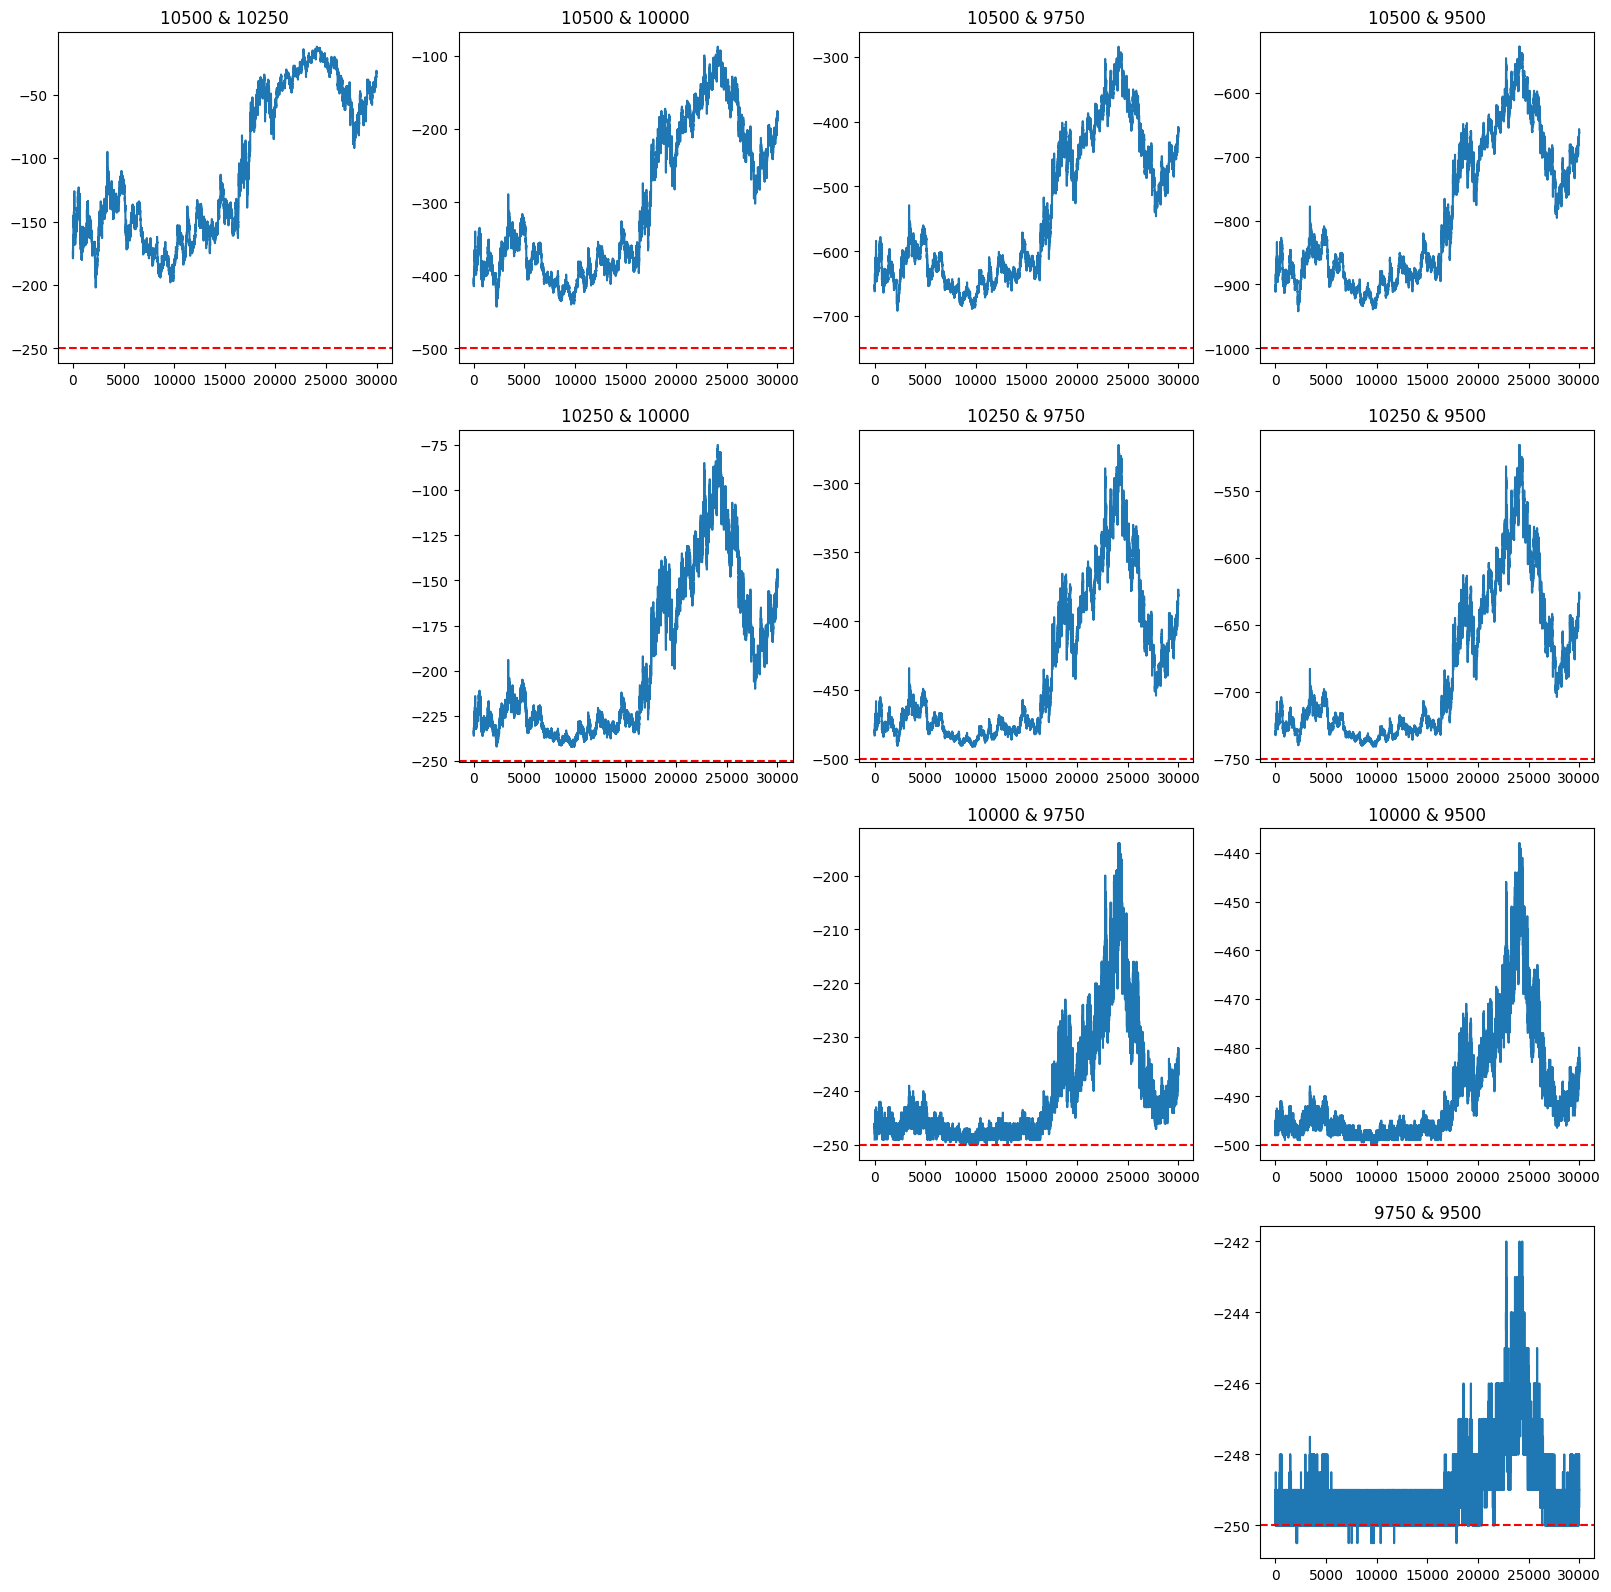

In [936]:
vouchers = ['VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_10250',
            'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_9750', 
            'VOLCANIC_ROCK_VOUCHER_9500',
            ]

plt.figure(figsize=(25, 25))
for i, voucher1 in enumerate(vouchers):
    for j, voucher2 in enumerate(vouchers):
        if i < j:
            voucher_1_df = vouchers_df[vouchers_df['product'] == voucher1]['mid_price'].values
            voucher_2_df = vouchers_df[vouchers_df['product'] == voucher2]['mid_price'].values
            
            strike1 = int(voucher1.split('_')[-1])
            strike2 = int(voucher2.split('_')[-1])

            strike_line = strike2 - strike1

            diff = voucher_1_df - voucher_2_df

            plt.subplot(5, 5, i*5 + j + 1)
            plt.plot(diff, label=f'{voucher1} - {voucher2}')
            plt.title(f"{strike1} & {strike2}")
            plt.axhline(y=strike_line, color='r', linestyle='--', label=f'Strike difference: {strike_line}')


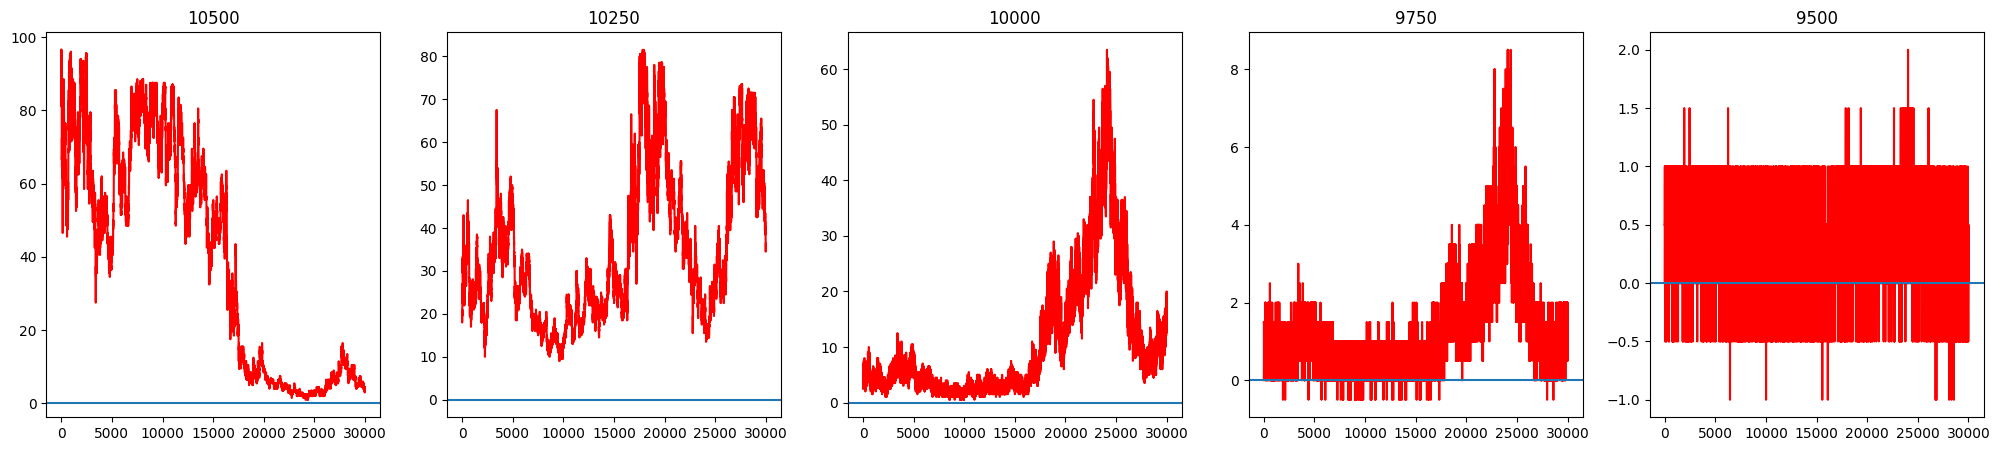

In [940]:
vouchers = ['VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_10250',
            'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_9750', 
            'VOLCANIC_ROCK_VOUCHER_9500',
            ]

plt.figure(figsize=(25, 5))
for i, voucher1 in enumerate(vouchers):
    voucher_1_df = vouchers_df[vouchers_df['product'] == voucher1]

    strike = int(voucher1.split('_')[-1])

    price = voucher_1_df['mid_price'].values
    underlying = voucher_1_df['underlying_price'].values
    intrinsic_value = np.maximum(0, underlying - strike)

    plt.subplot(1, 5, i + 1)
    plt.plot(price - intrinsic_value, c='red')
    plt.axhline(0)
    plt.title(f"{strike}")

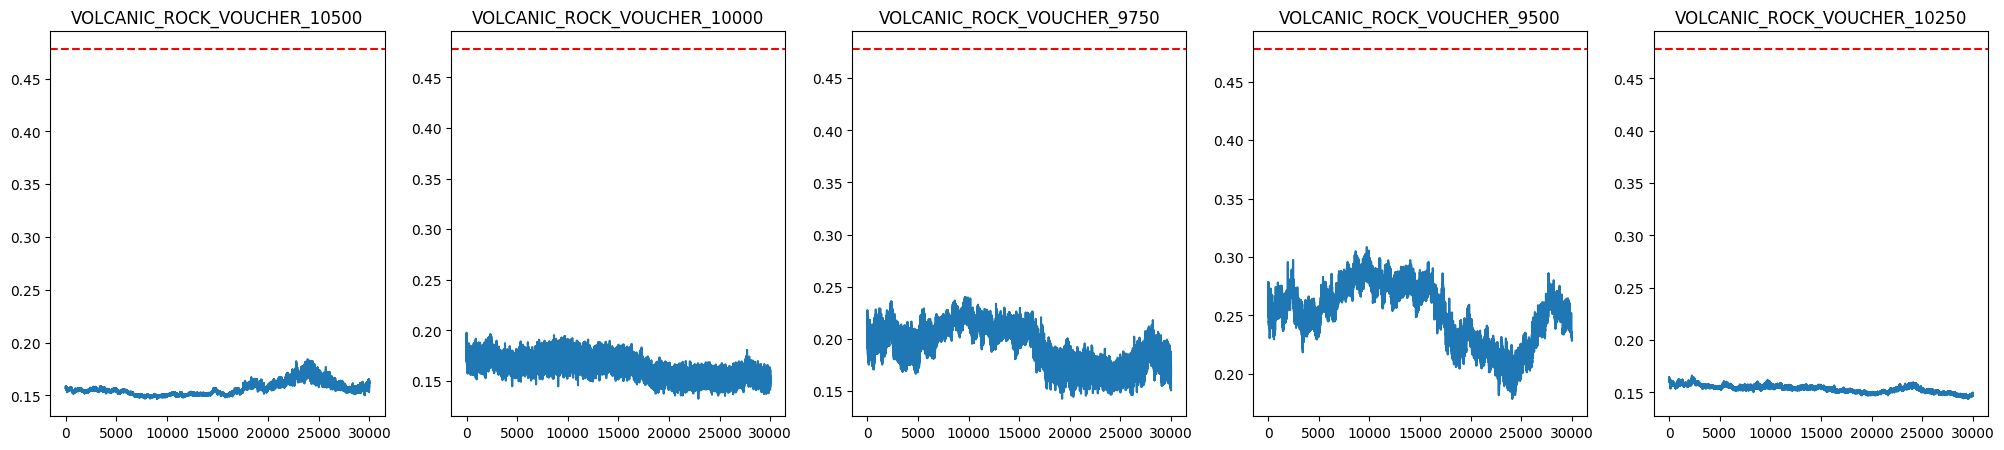

In [890]:
vouchers = vouchers_df['product'].unique()

i = 1
plt.figure(figsize=(25, 5))
for voucher in vouchers:
    df = vouchers_df[vouchers_df['product'] == voucher]

    iv = fix_data(df['implied_vol'].values)
    plt.subplot(1, 5, i)
    i+=1
    plt.plot(iv)
    plt.axhline(y=rv, color='r', linestyle='--')
    plt.title(voucher)

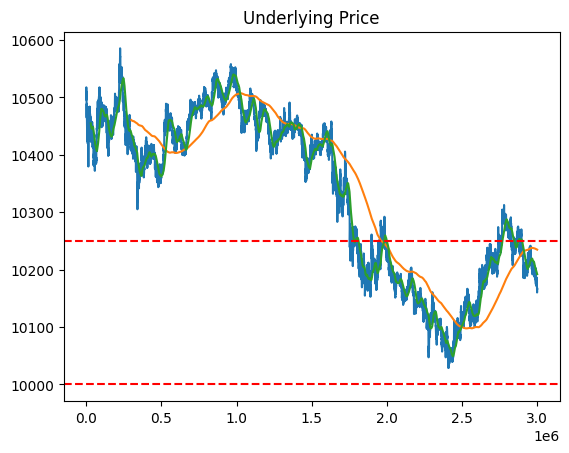

In [1049]:
plt.plot(underlying['timestamp'], underlying['mid_price'], label='Underlying Price')

slow_rolling_mean = underlying['mid_price'].rolling(window=3000).mean()
fast_rolling_mean = underlying['mid_price'].rolling(window=300).mean()

plt.title('Underlying Price')
plt.plot(underlying['timestamp'], slow_rolling_mean, label='Slow Rolling Mean')
plt.plot(underlying['timestamp'], fast_rolling_mean, label='Fast Rolling Mean')
plt.axhline(10250, color='r', linestyle='--', label='Strike Price')
plt.axhline(10000, color='r', linestyle='--', label='Strike Price')


In [ ]:
vouchers_df['day'] = vouchers_df['timestamp'] // 1000000
vouchers_df['day'] = vouchers_df['day'].astype(int)


0         0
1         0
2         0
3         0
4         0
         ..
149995    2
149996    2
149997    2
149998    2
149999    2
Name: day, Length: 150000, dtype: int32

Model coefficients:
a: 11.19879811131185
b: -0.09488532063851446
c: 0.15277929674405508

Model coefficients:
a: 12.24672906735744
b: -0.01675241960295715
c: 0.15021410644978456

Model coefficients:
a: 15.261957613427928
b: -0.008485243748121471
c: 0.-0.008485243748121471

In [ ]:
plt.plot

In [1051]:
day_df = vouchers_df[vouchers_df['day'] == 0]
day_df = vouchers_df

Model coefficients:
a: 11.126817177399653
b: 0.03015855328529925
c: 0.15140122570599449


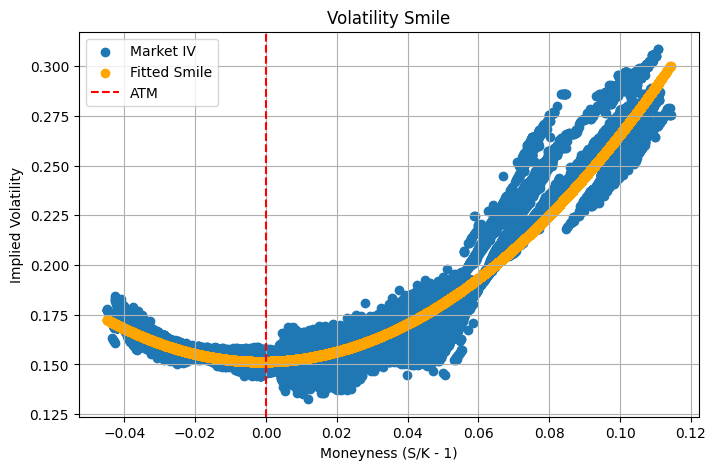

In [1052]:
# i want to keep 10000 voucher and 10250 voucher and 10500 voucher
dfs = []
dfs.append(day_df[day_df['product'] == 'VOLCANIC_ROCK_VOUCHER_9500'])
dfs.append(day_df[day_df['product'] == 'VOLCANIC_ROCK_VOUCHER_10000'])
dfs.append(day_df[day_df['product'] == 'VOLCANIC_ROCK_VOUCHER_10250'])
dfs.append(day_df[day_df['product'] == 'VOLCANIC_ROCK_VOUCHER_10500'])


copy_df = pd.concat(dfs)
copy_df.reset_index(drop=True, inplace=True)

copy_df['Moneyness'] = copy_df['underlying_price'] / copy_df['strike_price'] - 1 
# negtive for OTM, positive for ITM

X = copy_df['Moneyness'].values
Y = fix_data(copy_df['implied_vol'].values)

if Y[0] is None:
    Y[0] = Y[1]


from sklearn.linear_model import LinearRegression
import numpy as np

X_fit = np.vstack([np.square(X), X, np.ones_like(X)]).T

model = LinearRegression().fit(X_fit, Y)

model.coef_[0]
model.coef_[0]
model.intercept_

Y_fit = model.predict(X_fit)

print("Model coefficients:")
print("a:", model.coef_[0])
print("b:", model.coef_[1])
print("c:", model.intercept_)

# Plot the fit
plt.figure(figsize=(8,5))
plt.scatter(X, Y, label='Market IV')
plt.scatter(X, Y_fit, color='orange', label='Fitted Smile')
plt.axvline(0.0, color='red', linestyle='--', label='ATM')
plt.xlabel("Moneyness (S/K - 1)")
plt.ylabel("Implied Volatility")
plt.title(f"Volatility Smile")
plt.legend()
plt.grid(True)


copy_df['fitted_iv'] = Y_fit
copy_df['iv_diff'] = copy_df['implied_vol'] - copy_df['fitted_iv']

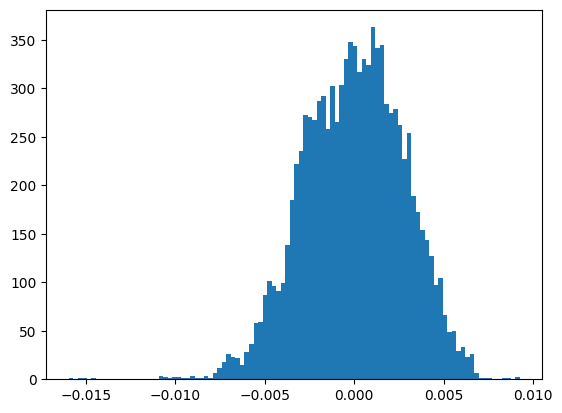

In [985]:
plt.hist(copy_df['iv_diff'].values, bins=100)
plt.show()

In [ ]:
copy_df['iv_diff']

copy_df['fitted_price'] = copy_df.apply(lambda row: black_scholes_call(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['fitted_iv']), axis=1)


0        0.006273
1        0.005230
2        0.005893
3        0.005225
4        0.005658
           ...   
29995   -0.002550
29996   -0.002228
29997   -0.002227
29998   -0.002385
29999   -0.002064
Name: iv_diff, Length: 30000, dtype: float64

In [919]:
copy_df['fitted_mid_price'] = copy_df.apply(lambda row: black_scholes_call(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['fitted_iv']), axis=1)

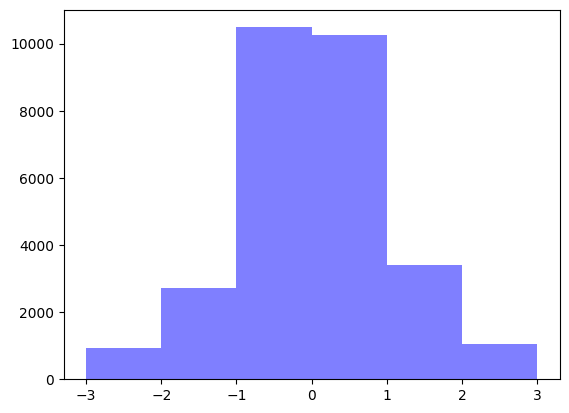

In [946]:
copy_df['diff_mid_price'] = copy_df['mid_price'] - copy_df['fitted_mid_price']

voucher = 'VOLCANIC_ROCK_VOUCHER_10000'
day = 0

tmp = copy_df[copy_df['product'] == voucher]


tmp = copy_df[copy_df['product'] == voucher]['diff_mid_price'].values

bins = [-3, -2, -1, 0, 1, 2, 3]
plt.hist(tmp, bins=bins, alpha=0.5, color='blue', label='Diff Mid Price')
plt.show()

In [912]:
voucher_df.head(2).values

array([[0, 'VOLCANIC_ROCK_VOUCHER_10500', 99.5, 10500, 0.021917808219178,
        10503.0, 0.1579951026797686],
       [100, 'VOLCANIC_ROCK_VOUCHER_10500', 102.5, 10500,
        0.0219175342465753, 10510.0, 0.1570176596408425]], dtype=object)

In [913]:
tte = 0.0219175342465753
underlying = 10510.0
strike = 10500.0
call_price = 102.5
IV = 0.1579951026797686
fit_iv = 0.1570176596408425

# calculate call price with fitted IV
call_1 = black_scholes_call(underlying, strike, tte, IV)
call_2 = black_scholes_call(underlying, strike, tte, fit_iv)

call_1, call_2, call_price

(103.10590141812554, 102.49999999998818, 102.5)

In [911]:
voucher = 'VOLCANIC_ROCK_VOUCHER_10500'

a = 10.736993001294937
b = -0.034372393499278946
c = 0.1512205065875294

voucher_df = vouchers_df[vouchers_df['product'] == voucher]
voucher_df.reset_index(drop=True, inplace=True)

iv = fix_data(voucher_df['implied_vol'].values)

voucher_df['fitted_iv'] = a * np.square(voucher_df['Moneyness']) + b * voucher_df['Moneyness'] + c

difference = iv - voucher_df['fitted_iv']

plt.plot(iv, label='Market IV')
plt.plot(voucher_df['fitted_iv'], label='Fitted IV')

KeyError: 'Moneyness'

(0.0, 1000.0)

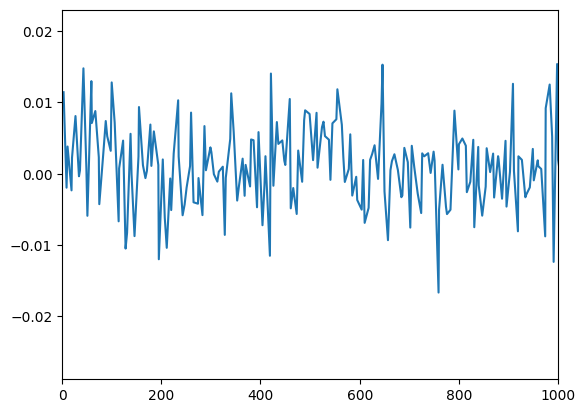

In [851]:
voucher = 'VOLCANIC_ROCK_VOUCHER_9500'

voucher_df = vouchers_df[vouchers_df['product'] == voucher]

plt.plot(voucher_df['iv_diff'])
plt.xlim(0, 1000)

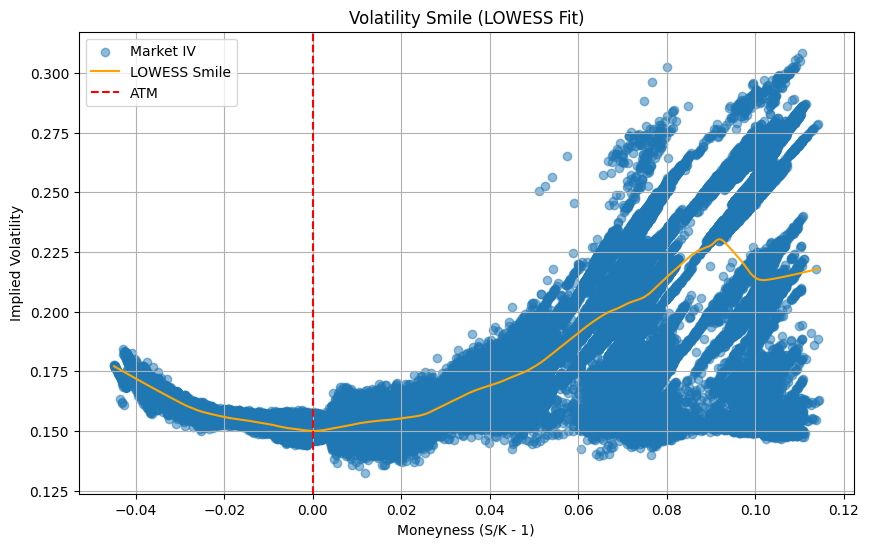

In [844]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import matplotlib.pyplot as plt

# Sort X for smooth plotting
sorted_idx = np.argsort(X)
X_sorted = X[sorted_idx]
Y_sorted = Y[sorted_idx]

# LOWESS smoothing (adjust frac for smoothness)
lowess_result = lowess(Y_sorted, X_sorted, frac=0.1, return_sorted=True)
x_lowess, y_lowess = lowess_result[:, 0], lowess_result[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, label='Market IV')
plt.plot(x_lowess, y_lowess, color='orange', label='LOWESS Smile')
plt.axvline(0.0, color='red', linestyle='--', label='ATM')
plt.xlabel("Moneyness (S/K - 1)")
plt.ylabel("Implied Volatility")
plt.title("Volatility Smile (LOWESS Fit)")
plt.legend()
plt.grid(True)
plt.show()


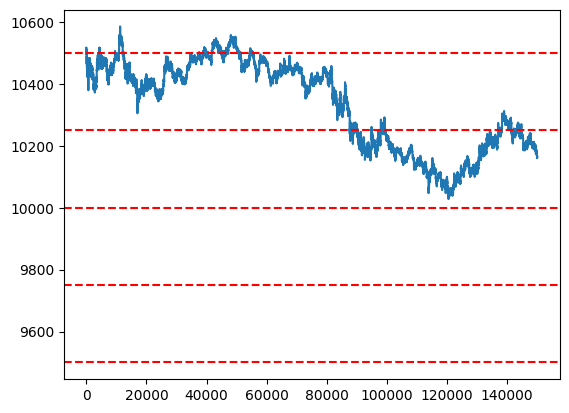

In [ ]:
vouchers = ['VOLCANIC_ROCK_VOUCHER_10500',
            'VOLCANIC_ROCK_VOUCHER_10250',
            'VOLCANIC_ROCK_VOUCHER_10000',
            'VOLCANIC_ROCK_VOUCHER_9750',
            'VOLCANIC_ROCK_VOUCHER_9500']

underlying_prices = vouchers_df[vouchers_df['product'] == 'VOLCANIC_ROCK_VOUCHER_10500'][['underlying_price', 'timestamp']]
plt.plot(underlying_prices['underlying_price'])
plt.axhline(10500, color='red', linestyle='--')
plt.axhline(10250, color='red', linestyle='--')
plt.axhline(10000, color='red', linestyle='--')
plt.axhline(9750, color='red', linestyle='--')
plt.axhline(9500, color='red', linestyle='--')

In [516]:
underlying_prices['underlying_price']

returns = np.log(underlying_prices['underlying_price'] / underlying_prices['underlying_price'].shift(1))
rv_std = returns.std()

hard_coded_rv = rv_std * np.sqrt(365 * 10000)
hard_coded_rv 

0.47819602665563404

In [507]:
def realized_vol(df, spot_col='underlying_price', window=1000):
    returns = np.log(df[spot_col] / df[spot_col].shift(1))
    rolling_std = returns.rolling(window=window).std() 
    timesteps_per_year = 3.65e6 / 2
    print(rolling_std.mean())
    annualization_factor = np.sqrt(timesteps_per_year)
    df['realized_vol'] = rolling_std * annualization_factor
    return df

In [ ]:
from math import log, sqrt, exp
from statistics import NormalDist

class BlackScholes:
    @staticmethod
    def black_scholes_call(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        d2 = d1 - volatility * sqrt(time_to_expiry)
        call_price = spot * NormalDist().cdf(d1) - strike * NormalDist().cdf(d2)
        return call_price

    @staticmethod
    def black_scholes_put(spot, strike, time_to_expiry, volatility):
        d1 = (log(spot / strike) + (0.5 * volatility * volatility) * time_to_expiry) / (
            volatility * sqrt(time_to_expiry)
        )
        d2 = d1 - volatility * sqrt(time_to_expiry)
        put_price = strike * NormalDist().cdf(-d2) - spot * NormalDist().cdf(-d1)
        return put_price

    @staticmethod
    def delta(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        return NormalDist().cdf(d1)

    @staticmethod
    def gamma(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        return NormalDist().pdf(d1) / (spot * volatility * sqrt(time_to_expiry))

    @staticmethod
    def vega(spot, strike, time_to_expiry, volatility):
        d1 = (
            log(spot) - log(strike) + (0.5 * volatility * volatility) * time_to_expiry
        ) / (volatility * sqrt(time_to_expiry))
        return NormalDist().pdf(d1) * (spot * sqrt(time_to_expiry)) / 100

    @staticmethod
    def implied_volatility(
        call_price, spot, strike, time_to_expiry, max_iterations=200, tolerance=1e-10
    ):
        low_vol = 0.001
        high_vol = 1.0
        volatility = (low_vol + high_vol) / 2.0  # Initial guess as the midpoint
        for _ in range(max_iterations):
            estimated_price = BlackScholes.black_scholes_call(
                spot, strike, time_to_expiry, volatility
            )
            diff = estimated_price - call_price
            if abs(diff) < tolerance:
                break
            elif diff > 0:
                high_vol = volatility
            else:
                low_vol = volatility
            volatility = (low_vol + high_vol) / 2.0
        return volatility
    
model = BlackScholes()

C:\Users\chris\AppData\Local\Temp\ipykernel_28312\2385773071.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


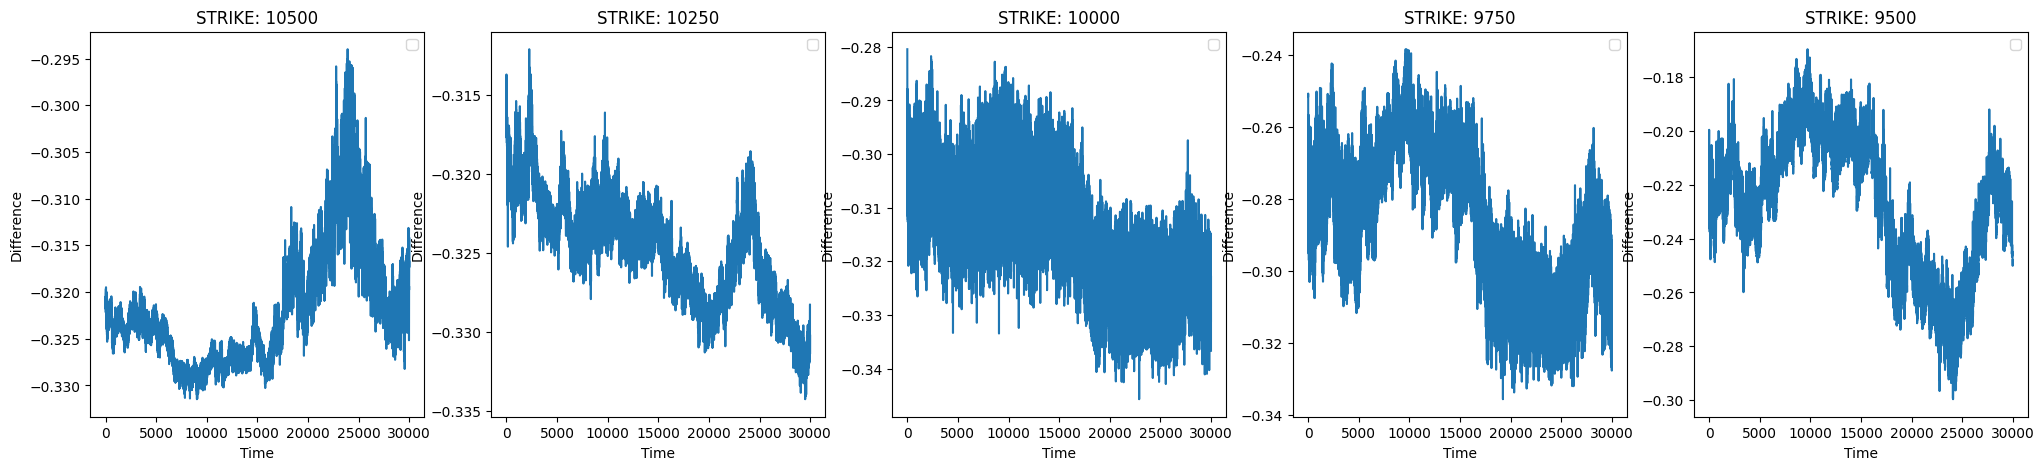

In [ ]:
voucher = vouchers[4]
plt.figure(figsize=(25, 5))
i = 1
for voucher in vouchers:
    voucher_df = vouchers_df[vouchers_df['product'] == voucher]
    strike_price = int(voucher.split('_')[-1])

    # voucher_df['value'] = voucher_df.apply(lambda row: black_scholes_call(row['underlying_price'], row['strike_price'], row['time_to_expiry'], row['RV']), axis=1)

    # IV = pd.Series(fix_data(voucher_df['implied_vol'].values))
    # diff = RV - IV

    # diff = voucher_df['value'] - voucher_df['mid_price']

    IV = pd.Series(fix_data(voucher_df['implied_vol'].values))

    difference = IV - hard_coded_rv

    plt.subplot(1, 5, i)
    i += 1
    plt.plot(difference)
    # plt.plot(RV, label='real_vol')
    plt.legend()
    plt.title(f'STRIKE: {strike_price}')
    plt.xlabel('Time')
    plt.ylabel('Difference')

    plt.plot()

